## Importing neccessary libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB

## Reading the data file

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Based on mean and mode(50%) values there is outliers in capital-gain and capital-loss column and it is left skewed 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Cleaning

- Removing all null values if any

In [6]:
df.replace("?", np.NaN, inplace = True)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
list(df[["education", "education-num"]].groupby("education-num"))

[(1,
          education  education-num
  224     Preschool              1
  932     Preschool              1
  2884    Preschool              1
  2946    Preschool              1
  3446    Preschool              1
  3592    Preschool              1
  4107    Preschool              1
  6433    Preschool              1
  6864    Preschool              1
  7070    Preschool              1
  7173    Preschool              1
  7894    Preschool              1
  8080    Preschool              1
  8088    Preschool              1
  8096    Preschool              1
  8775    Preschool              1
  10310   Preschool              1
  11134   Preschool              1
  11360   Preschool              1
  11734   Preschool              1
  13248   Preschool              1
  15059   Preschool              1
  16497   Preschool              1
  16562   Preschool              1
  18415   Preschool              1
  20440   Preschool              1
  21370   Preschool              1
  21388   Presc

- Education is redundant
- Hence dropping the Education column

In [9]:
df.drop(["education"], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  country         32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


### Dealing with categorical value

In [10]:
workclass_mapper = {key: value for value, key in enumerate(df.workclass.unique())}
marital_status_mapper = {key: value for value, key in enumerate(df["marital-status"].unique())}
occupation_mapper = {key: value for value, key in enumerate(df.occupation.unique())}
relationship_mapper = {key: value for value, key in enumerate(df.relationship.unique())}
race_mapper = {key: value for value, key in enumerate(df.race.unique())}
sex_mapper = {key: value for value, key in enumerate(df.sex.unique())}
native_country_mapper = {key: value for value, key in enumerate(df["country"].unique())}

df.workclass = df.workclass.map(workclass_mapper)
df["marital-status"] = df["marital-status"].map(marital_status_mapper)
df.occupation = df.occupation.map(occupation_mapper)
df.relationship = df.relationship.map(relationship_mapper)
df.race = df.race.map(race_mapper)
df.sex = df.sex.map(sex_mapper)
df["country"] = df["country"].map(native_country_mapper)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  int64 
 2   fnlwgt          32561 non-null  int64 
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  int64 
 5   occupation      32561 non-null  int64 
 6   relationship    32561 non-null  int64 
 7   race            32561 non-null  int64 
 8   sex             32561 non-null  int64 
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  country         32561 non-null  int64 
 13  salary          32561 non-null  object
dtypes: int64(13), object(1)
memory usage: 3.5+ MB


In [12]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,0,77516,13,0,0,0,0,0,2174,0,40,0,<=50K
1,50,1,83311,13,1,1,1,0,0,0,0,13,0,<=50K
2,38,2,215646,9,2,2,0,0,0,0,0,40,0,<=50K
3,53,2,234721,7,1,2,1,1,0,0,0,40,0,<=50K
4,28,2,338409,13,1,3,2,1,1,0,0,40,1,<=50K


In [13]:
df.describe()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,2.309972,1.897784e+05,10.080679,1.083781,4.666411,1.542397,0.221707,0.330795,1077.648844,87.303830,40.437456,1.290317
std,13.640433,1.225728,1.055500e+05,2.572720,1.251381,3.386119,1.437431,0.627348,0.470506,7385.292085,402.960219,12.347429,5.045373
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,1.178270e+05,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,2.000000,1.783560e+05,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.000000,2.370510e+05,12.000000,1.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,8.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


In [14]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

### Converting into 1 & 0

In [15]:
salary_mapper = {' <=50K': 0, ' >50K': 1}
df.salary = df.salary.map(salary_mapper)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education-num   32561 non-null  int64
 4   marital-status  32561 non-null  int64
 5   occupation      32561 non-null  int64
 6   relationship    32561 non-null  int64
 7   race            32561 non-null  int64
 8   sex             32561 non-null  int64
 9   capital-gain    32561 non-null  int64
 10  capital-loss    32561 non-null  int64
 11  hours-per-week  32561 non-null  int64
 12  country         32561 non-null  int64
 13  salary          32561 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [17]:
df['salary']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

## EDA + Insights

<AxesSubplot:>

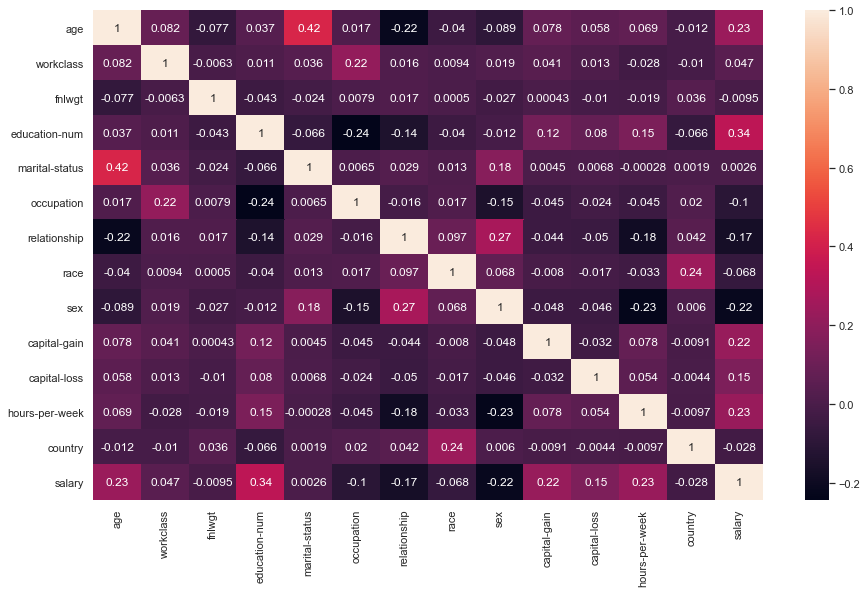

In [18]:
sns.set(rc={'figure.figsize':(15,9)})
sns.heatmap(df.corr(), annot = True)

- Based on heatmap marital-status is most related to age, then followed by education-num to salary
- fnlwgt is least related to other columns hence can be dropped

In [19]:
df.drop(["fnlwgt"], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   education-num   32561 non-null  int64
 3   marital-status  32561 non-null  int64
 4   occupation      32561 non-null  int64
 5   relationship    32561 non-null  int64
 6   race            32561 non-null  int64
 7   sex             32561 non-null  int64
 8   capital-gain    32561 non-null  int64
 9   capital-loss    32561 non-null  int64
 10  hours-per-week  32561 non-null  int64
 11  country         32561 non-null  int64
 12  salary          32561 non-null  int64
dtypes: int64(13)
memory usage: 3.2 MB


### Doing pairplot to understand the relation in more detail 

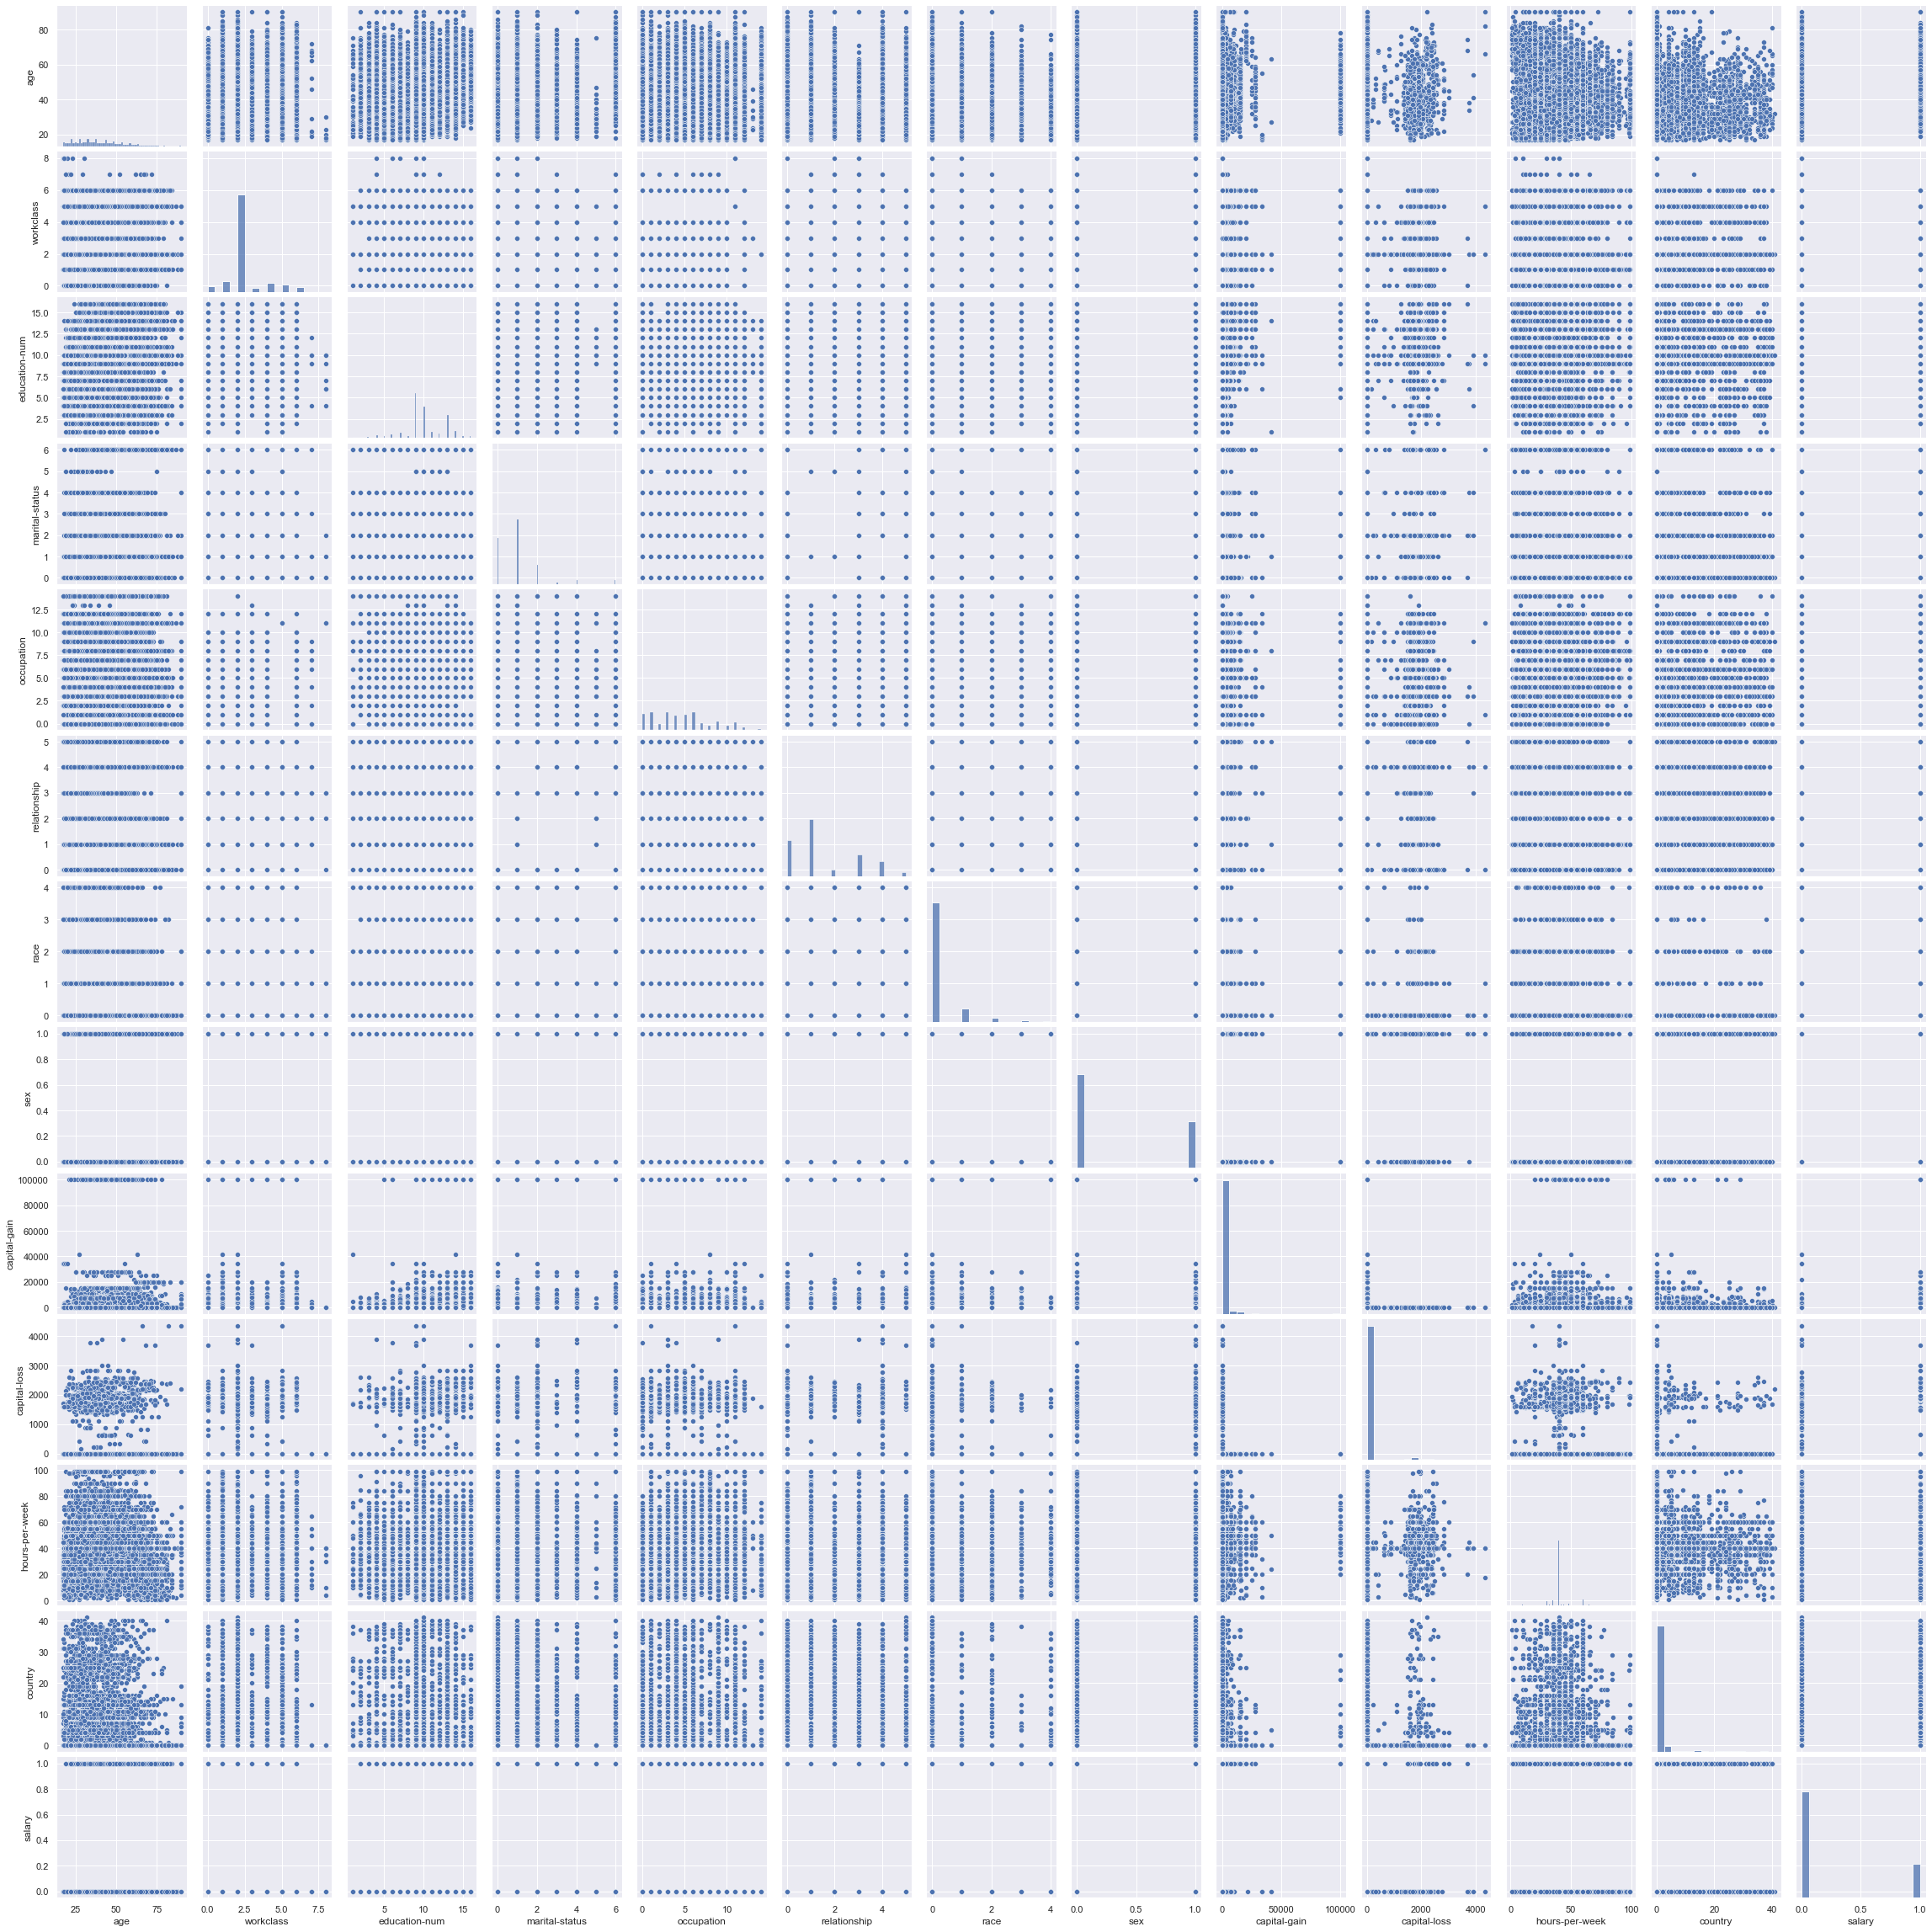

In [20]:
sns.pairplot(df)

- More dense plot represents more correlated variables.

## Feature Engineering

### Scaling

- There is large difference between range of values of each column except salary, due to which model can predict wrong values and its efficiency decreases hence before applying to the model we need to bring it in the similar range by using standard scaler.

In [21]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns = df.columns[:-1])
x

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,0.301370,0.000,0.800000,0.000000,0.000000,0.0,0.00,0.0,0.021740,0.0,0.397959,0.00000
1,0.452055,0.125,0.800000,0.166667,0.071429,0.2,0.00,0.0,0.000000,0.0,0.122449,0.00000
2,0.287671,0.250,0.533333,0.333333,0.142857,0.0,0.00,0.0,0.000000,0.0,0.397959,0.00000
3,0.493151,0.250,0.400000,0.166667,0.142857,0.2,0.25,0.0,0.000000,0.0,0.397959,0.00000
4,0.150685,0.250,0.800000,0.166667,0.214286,0.4,0.25,1.0,0.000000,0.0,0.397959,0.02439
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.250,0.733333,0.166667,0.714286,0.4,0.00,1.0,0.000000,0.0,0.377551,0.00000
32557,0.315068,0.250,0.533333,0.166667,0.642857,0.2,0.00,0.0,0.000000,0.0,0.397959,0.00000
32558,0.561644,0.250,0.533333,1.000000,0.000000,0.8,0.00,1.0,0.000000,0.0,0.397959,0.00000
32559,0.068493,0.250,0.533333,0.000000,0.000000,0.6,0.00,0.0,0.000000,0.0,0.193878,0.00000


In [22]:
y = df.iloc[:, -1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

### Spliting data in training and testing set of 80 and 20.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

## Modelling + Hyper Parameter Tuning

#### Gaussian Naive Bayes model

In [24]:
NB_mod = GaussianNB()
NB_mod.fit(x_train, y_train)

GaussianNB()

In [25]:
y_pred = NB_mod.predict(x_test)

- Checking its accuracy score

In [26]:
NB_mod.score(x_test, y_test)

0.8131429448794718

In [28]:
confusion_matrix(y_pred, y_test)

array([[4666,  975],
       [ 242,  630]], dtype=int64)

In [38]:
classification_report(y_pred, y_test)

'              precision    recall  f1-score   support\n\n           0       0.95      0.83      0.88      5641\n           1       0.39      0.72      0.51       872\n\n    accuracy                           0.81      6513\n   macro avg       0.67      0.77      0.70      6513\nweighted avg       0.88      0.81      0.83      6513\n'

### Random Forest Classifier

- Tuning the hyperparameters using GridSearchCV with gini criteria with number of estimators starting from 2 to 500 with step of 10 with cross validation fold of 10.

In [29]:
model = GridSearchCV(RandomForestClassifier(n_jobs = -1, criterion = "gini"), {"n_estimators": range(2, 100, 10)}, cv = 10)

In [30]:
model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'n_estimators': range(2, 100, 10)})

In [31]:
RF_mod = model.best_estimator_

In [32]:
y_pred_1 = RF_mod.predict(x_test)

In [33]:
RF_mod.score(x_test, y_test)

0.849531705819131

In [34]:
confusion_matrix(y_pred_1, y_test)

array([[4498,  570],
       [ 410, 1035]], dtype=int64)

In [36]:
classification_report(y_test, y_pred_1)

'              precision    recall  f1-score   support\n\n           0       0.89      0.92      0.90      4908\n           1       0.72      0.64      0.68      1605\n\n    accuracy                           0.85      6513\n   macro avg       0.80      0.78      0.79      6513\nweighted avg       0.85      0.85      0.85      6513\n'

- Random forest classifier has greater efficiency than 